# Create Discrete State Space Model. This script estimates the papameter matrices of State Stapce models.

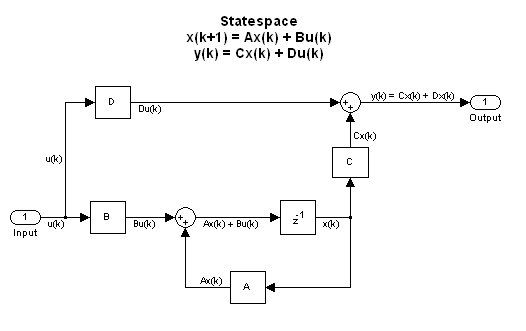

Random sampling starts with Iteration 1000
Best initial guess with error:  0.3475069889625994
Optimization starts ...
Optimization terminated successfully.
         Current function value: 0.048803
         Iterations: 2383
         Function evaluations: 3346
Residual error is: 
0.04880303302232435


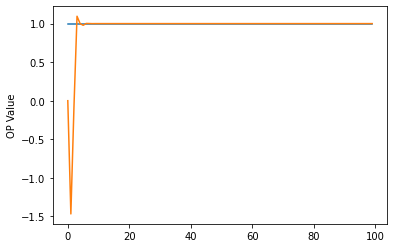

Eigen values of System matrix:  [-0.10812139+0.26758038j -0.10812139-0.26758038j  0.20260201+0.j        ]
Total time elapsed:  3.535926103591919


In [20]:
# Calling libraries
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt


# Creating the class
class cssm :
  def __init__(self, A, B, C):
      self.A = A
      self.B = B
      self.C = C

  # Creating the objective function
  def objFcn(self, x, flag = 0) :
    # Extract parameters for A matrix
    A1 = x[0 : self.A[0]*self.A[1]]
    # Extract parameters for B matrix
    B1 = x[self.A[0]*self.A[1] : self.A[0]*self.A[1] + self.B[0]*self.B[1]]
    # Extract parameters for C matrix
    C1 = x[self.A[0]*self.A[1] + self.B[0]*self.B[1] : self.A[0]*self.A[1] + self.B[0]*self.B[1] + self.C[0]*self.C[1]]

    # Reshape the matrices
    A1 = np.reshape(A1, (self.A[0], self.A[1])) # No of states X No of states
    B1 = np.reshape(B1, (self.B[0], self.B[1])) # No of states X No of inputs
    C1 = np.reshape(C1, (self.C[0], self.C[1])) # No of outputs X No of states

    # Creating initial state as 0
    [r_s, c_s] = np.shape(A1)
    x=np.zeros((r_s,1))

    # For reshaping the input
    [r_s, c_s] = np.shape(B1)

    # Creating a copy of output
    y_p = y.copy()
    [r_op, c_op] = np.shape(y_p)

    # Expanding through time
    for i in range(r_op) :
      y_p[i] = np.transpose(np.matmul(C1,x))
      x = np.matmul(A1,x) + np.matmul(B1,u[i].reshape(c_s,1)) #x[k+1]

    # To be edited >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    if flag == 1:
      plt.plot(y[:,0])
      plt.plot(y_p[:,0])
      plt.ylabel('OP Value')
      plt.show()
      print('Eigen values of System matrix: ', linalg.eigvals(A1))

    # Returning the error
    errVal = np.mean(np.abs(y - y_p))
    return(errVal)

  # Initialise function
  def optimizeMdl(self, ite1=100) :
    # Create a placeholder
    totalsizeParams = self.A[0]*self.A[1] + self.B[0]*self.B[1] + self.C[0]*self.C[1]
    valDummy = 1000000000000.00

    # Random sampling
    print('Random sampling starts with Iteration', ite1)
    for iRand in range(ite1):
      # sigma * np.random.randn(...) + mu
      xDummy = np.random.randn(1, totalsizeParams) # sigma = 1 and mu = 1
      xAccpeted = xDummy[0,:]
      if self.objFcn(x = xDummy[0,:]) < valDummy:
        valDummy = self.objFcn(x = xDummy[0,:])
        xAccpeted = xDummy[0,:]
    print('Best initial guess with error: ', valDummy)

    # Optimize
    print('Optimization starts ...')
    x0 = xAccpeted
    res = minimize(self.objFcn, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

    # Final residual error
    print('Residual error is: ')
    print(self.objFcn(x = res.x))

    # Validation : to be edited >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    self.objFcn(x = res.x, flag = 1)



# Inital validation of script

# Define the shapes of system matrices as global variables
A = [3,3] # No of states X No of states
B = [3,2] # No of states X No of inputs
C = [2,3] # No of outputs X No of states

# Time on
import time
start = time.time()

# Create dummy data
u = np.ones((100, 2)) # Samples X No of inputs
y = np.ones((100, 2)) # Samples X No of outputs

# Creating the model
ssm = cssm(A, B, C)
ssm.optimizeMdl(ite1=1000)

# Time off
end = time.time()
print('Total time elapsed: ', end - start)

In [ ]:
# Solving a differential equation

def vdp(t, z):
    x, y, z = z
    u0 = 1
    u1 = np.cos(t) * 10
    u2 = 1 # Kept constnt
    return [-x - y*z + u0, -y + x*z + u1, -z - x*y + u2]